In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from functools import reduce

%config InlineBackend.figure_format = 'retina'

def iterate_map(f, x_0, n):
    # careful with n = 1; will iterate 0 times
    # maybe it should be range(1, n + 1)?
    trajectory = np.zeros(n)
    trajectory[0] = x_0
    for i in range(1, n):
        trajectory[i] = f(trajectory[i-1])
    
    return trajectory

def get_plot(f, x_start, x_end, x_step=0.01):
    f_vec = np.vectorize(f)
    x = np.arange(x_start, x_end, x_step)
    y = f_vec(x)
    return np.column_stack((x, y))

def get_cobweb(trajectory):
    coords = np.column_stack((np.repeat(trajectory[:-1], 2), 
                              np.repeat(trajectory[1:], 2)))
    coords[::2] = np.column_stack((trajectory[:-1], trajectory[:-1]))
    return coords

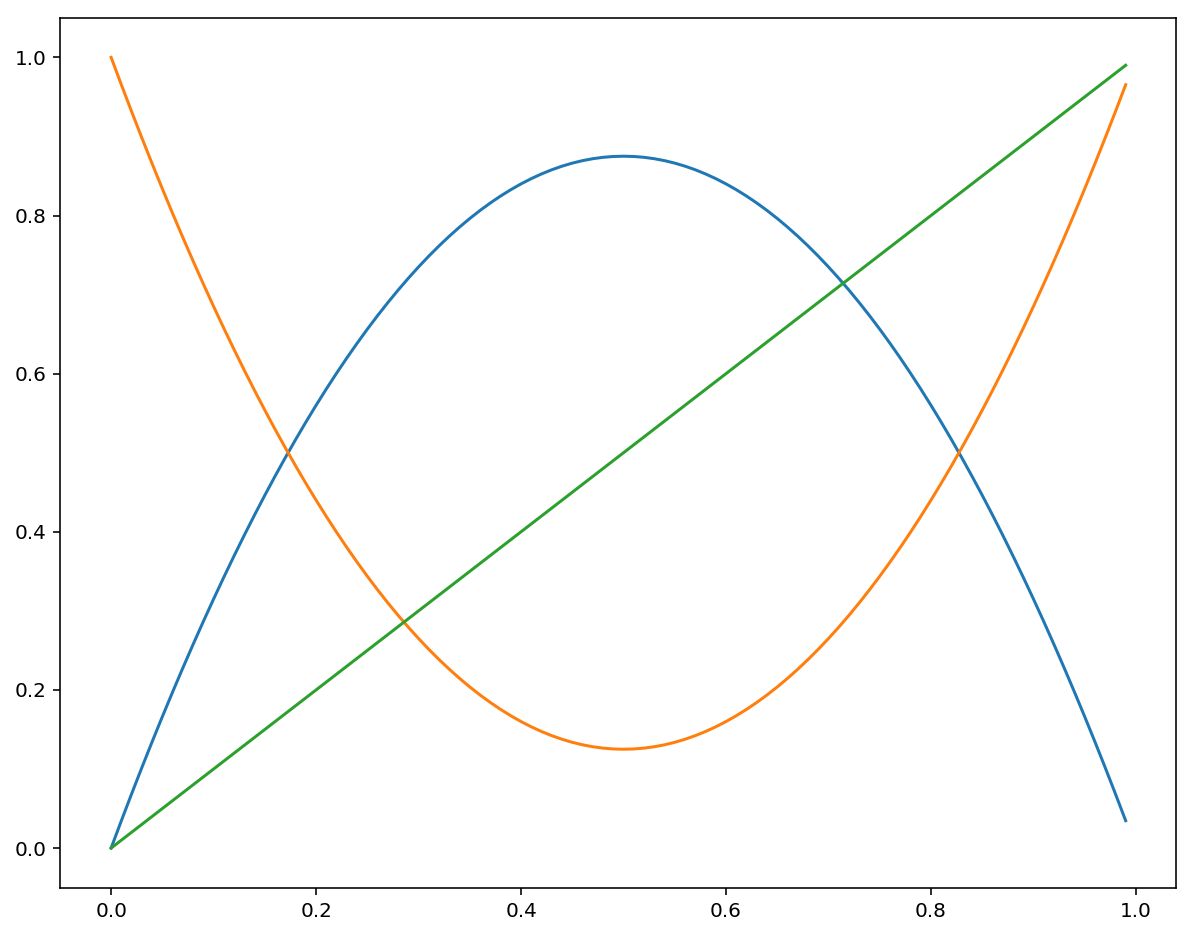

In [23]:
f = lambda x: 3.5 * x * (1 - x)
g = lambda x: 1 - f(x)
identity_fn = lambda x: x

f_plot = get_plot(f, 0, 1)
g_plot = get_plot(g, 0, 1)
line = get_plot(identity_fn, 0, 1)

fig, ax = plt.subplots(figsize=(10, 8))
# ax.set_prop_cycle(color=['#f9989f', '#fff072', '#b4e9e2'])


ax.plot(f_plot[:,0], f_plot[:,1])
ax.plot(g_plot[:,0], g_plot[:,1])
ax.plot(line[:,0], line[:,1])
plt.show()

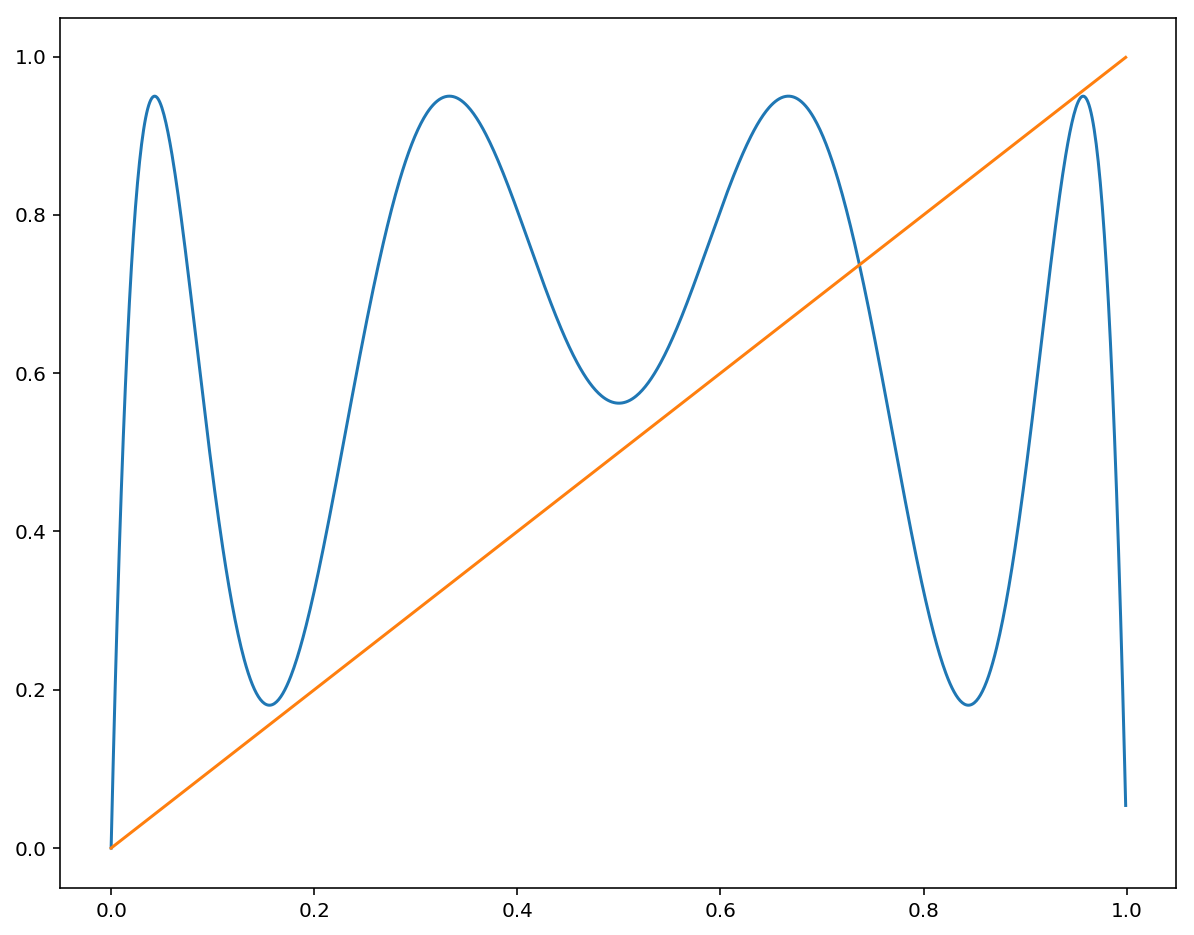

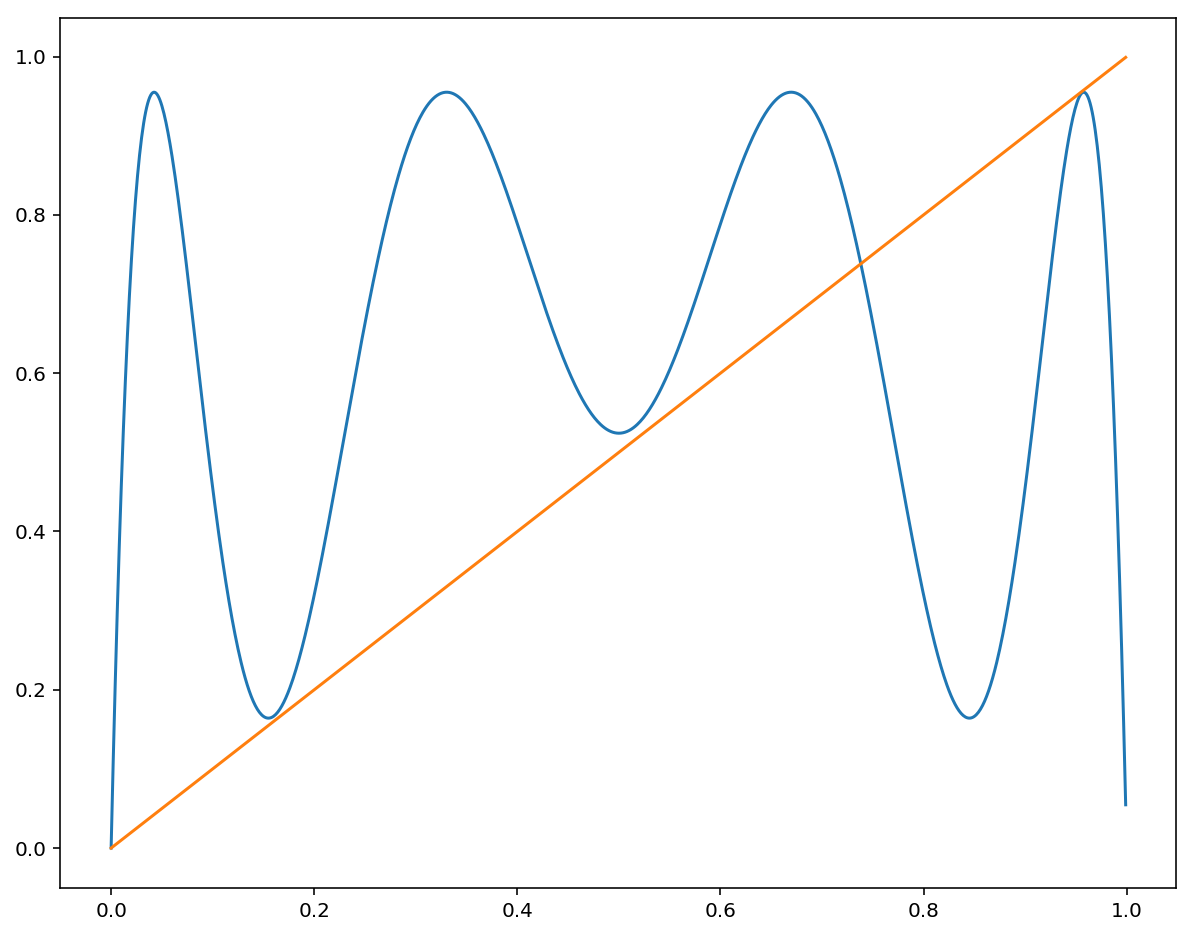

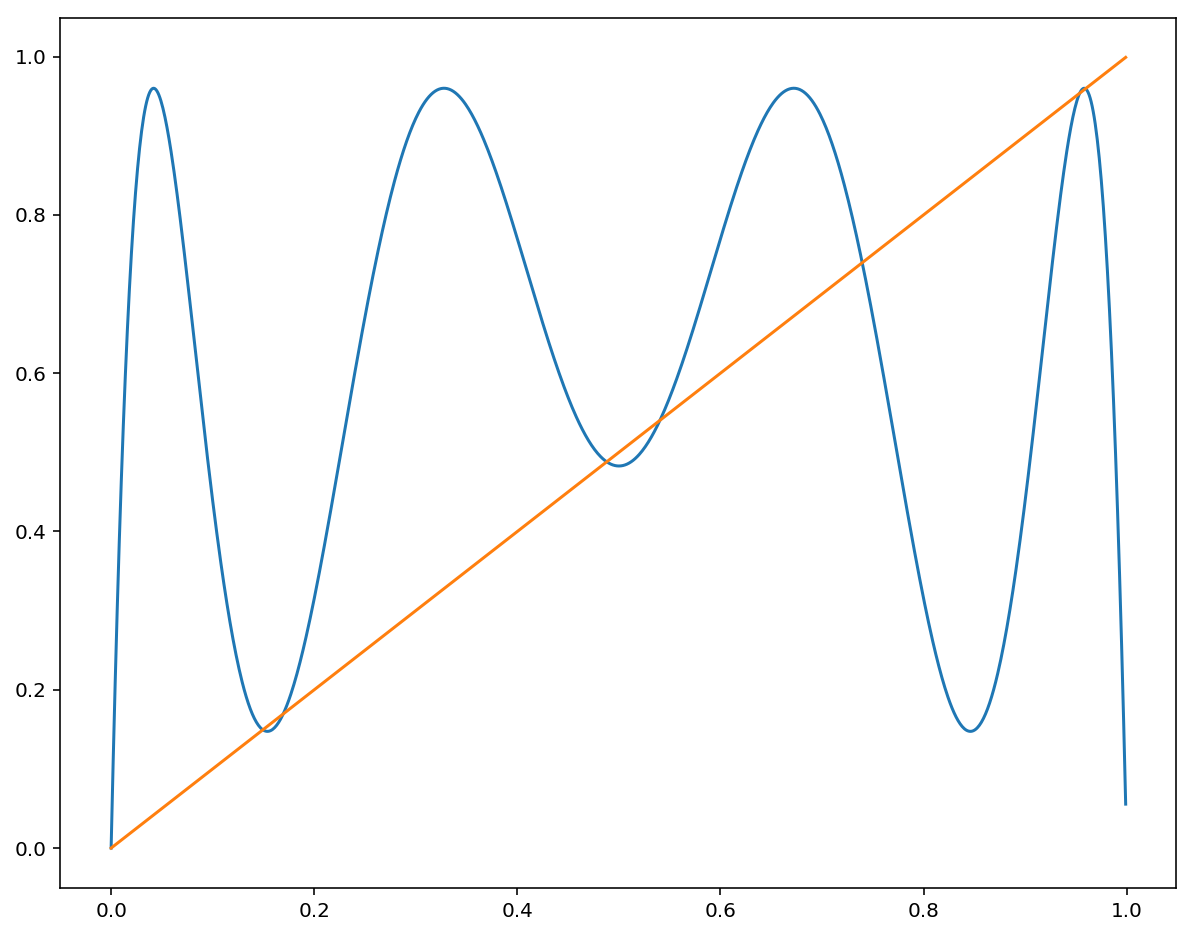

In [24]:
logistic_family = lambda a: lambda x: a*x*(1-x)
iterate_fn = lambda fn: lambda n: lambda x: \
                reduce(lambda x_i, fn_i: fn_i(x_i), [fn] * n, x)
logistic_3 = lambda a: iterate_fn(logistic_family(a))(3)

def plot_fns(fns, ax=None, start=0, end=1, step=0.001):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
#     ax.set_prop_cycle(color=['#f9989f', '#faf096', 'green'])
    
    for fn in fns:
        fn_plot = get_plot(fn, start, end, step)
        ax.plot(fn_plot[:,0], fn_plot[:,1])

    plt.show()    
    
plot_fns([logistic_3(3.8), identity_fn])
plot_fns([logistic_3(3.82), identity_fn])
plot_fns([logistic_3(3.84), identity_fn])

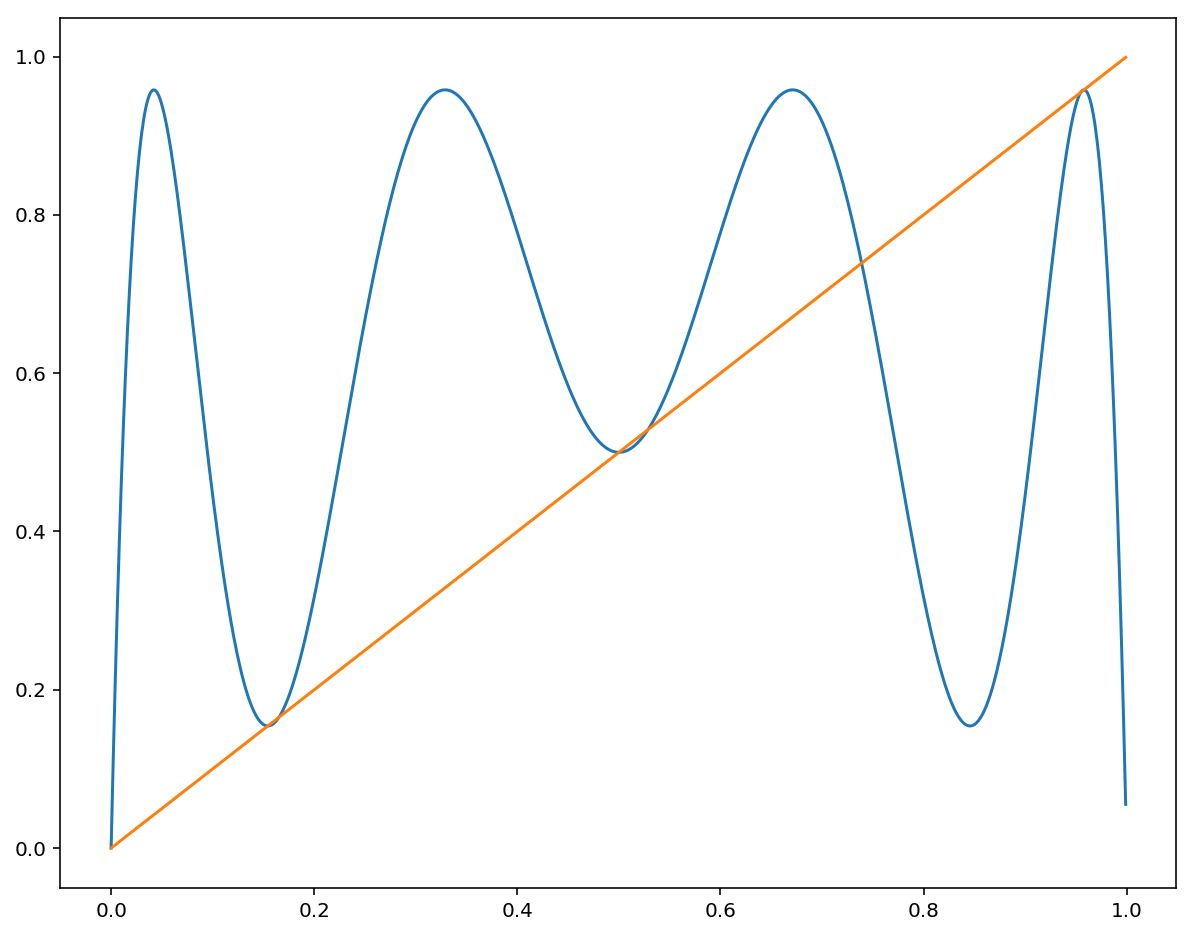

3.828400000000055


In [25]:
def find_intersect_param():
    a = 3.82
    closest = 1
    
    while closest > 0.0001:
        for x in np.arange(0.45, 0.55, 0.001):
            closest = min(logistic_3(a)(x) - x, closest)
        a += 0.00001

    return a

plot_fns([logistic_3(3.831874), identity_fn])

print(find_intersect_param())

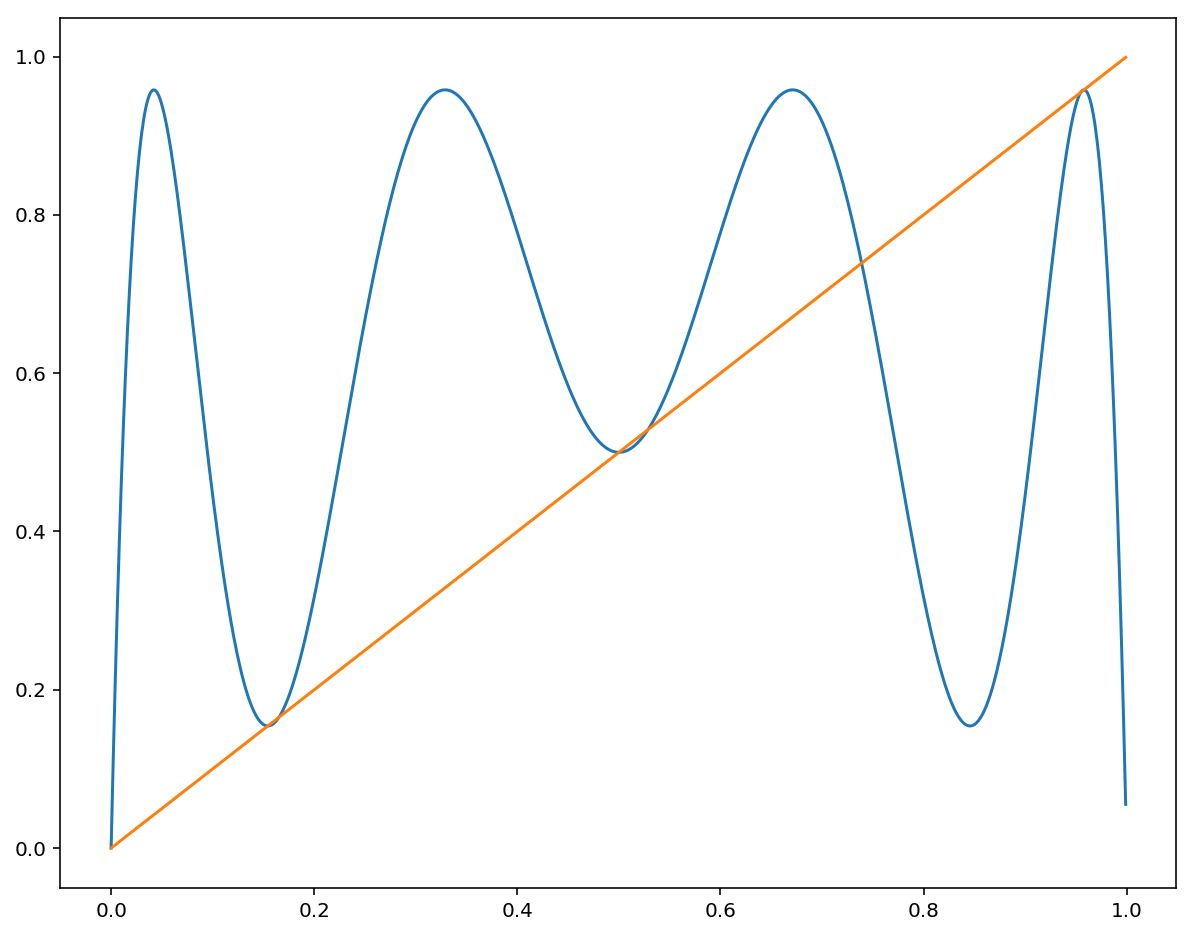

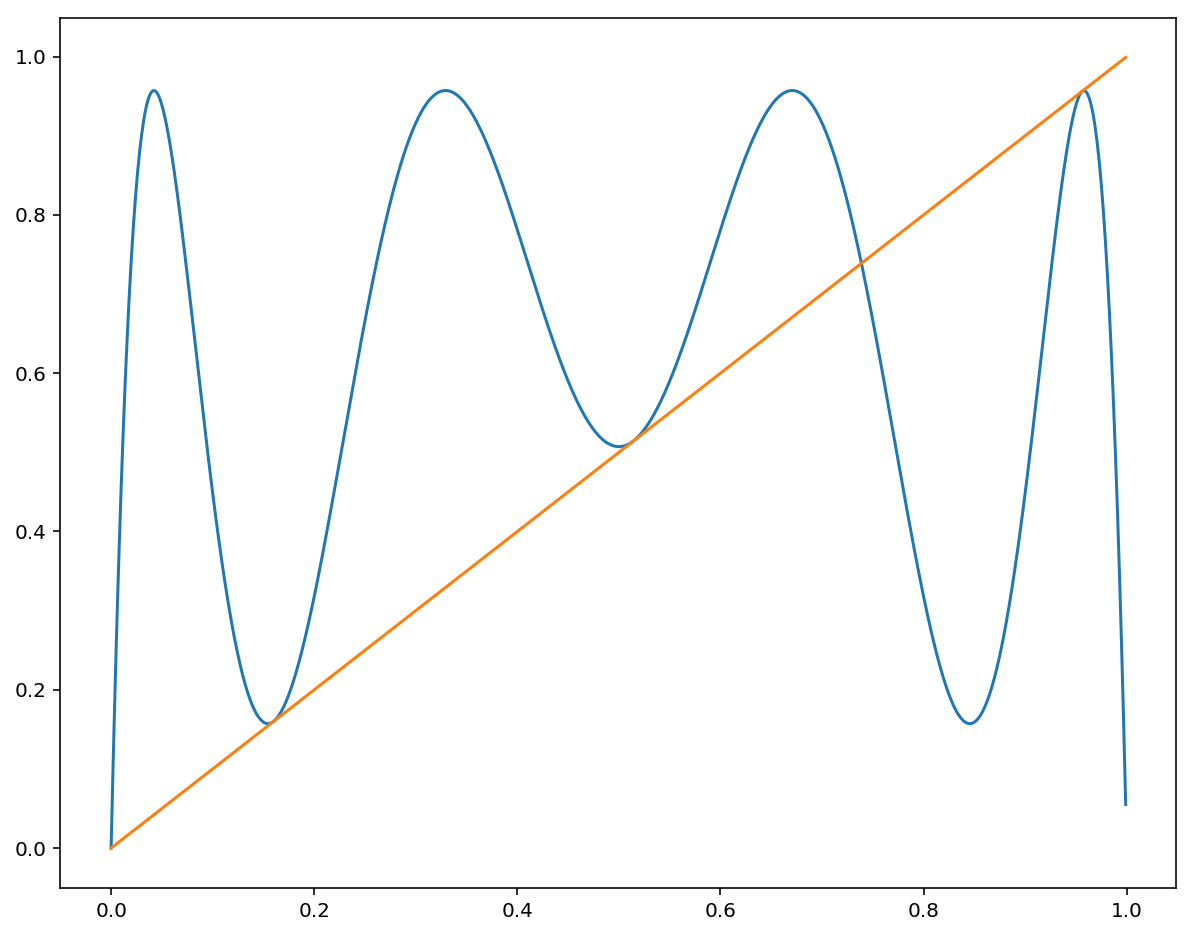

In [26]:
plot_fns([logistic_3(3.831874), identity_fn])
plot_fns([logistic_3(3.8284), identity_fn])

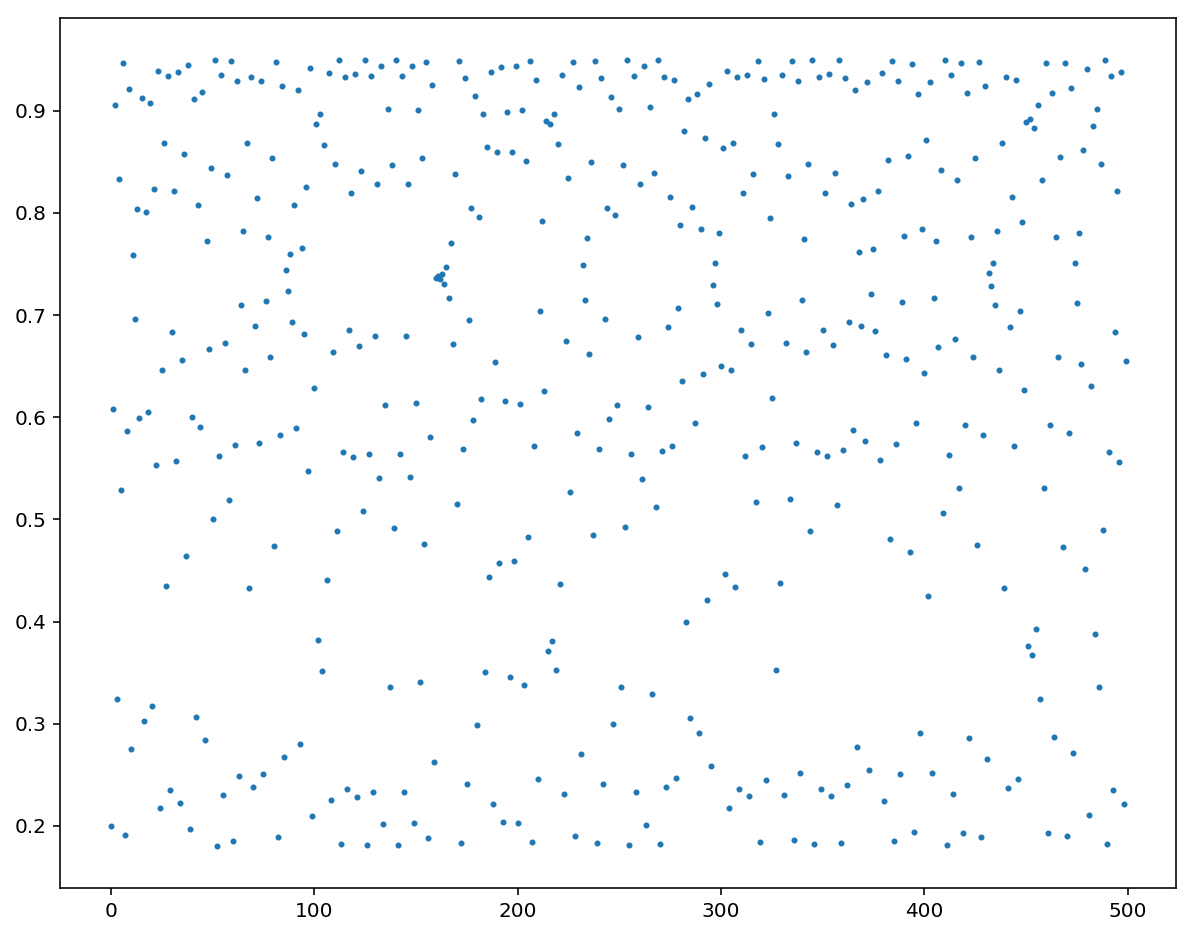

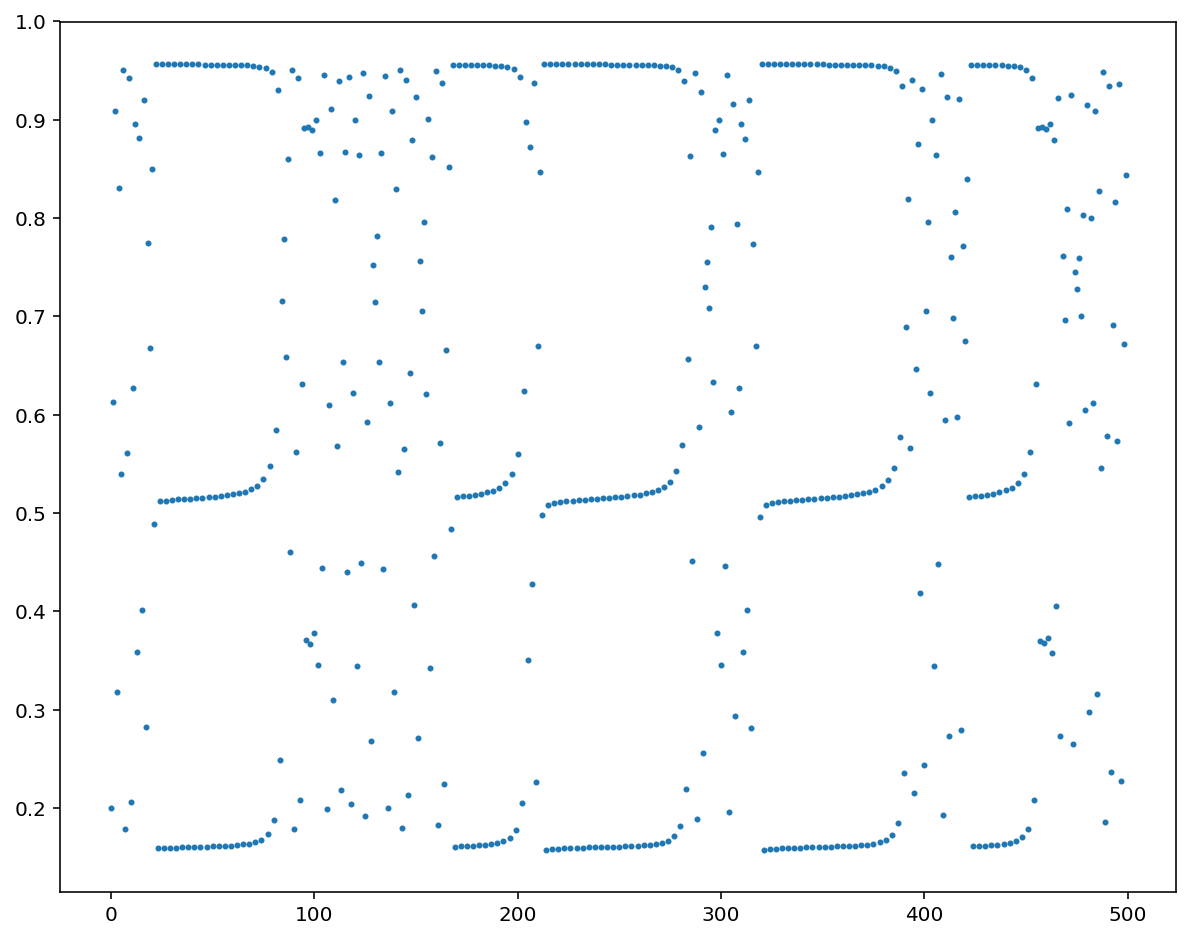

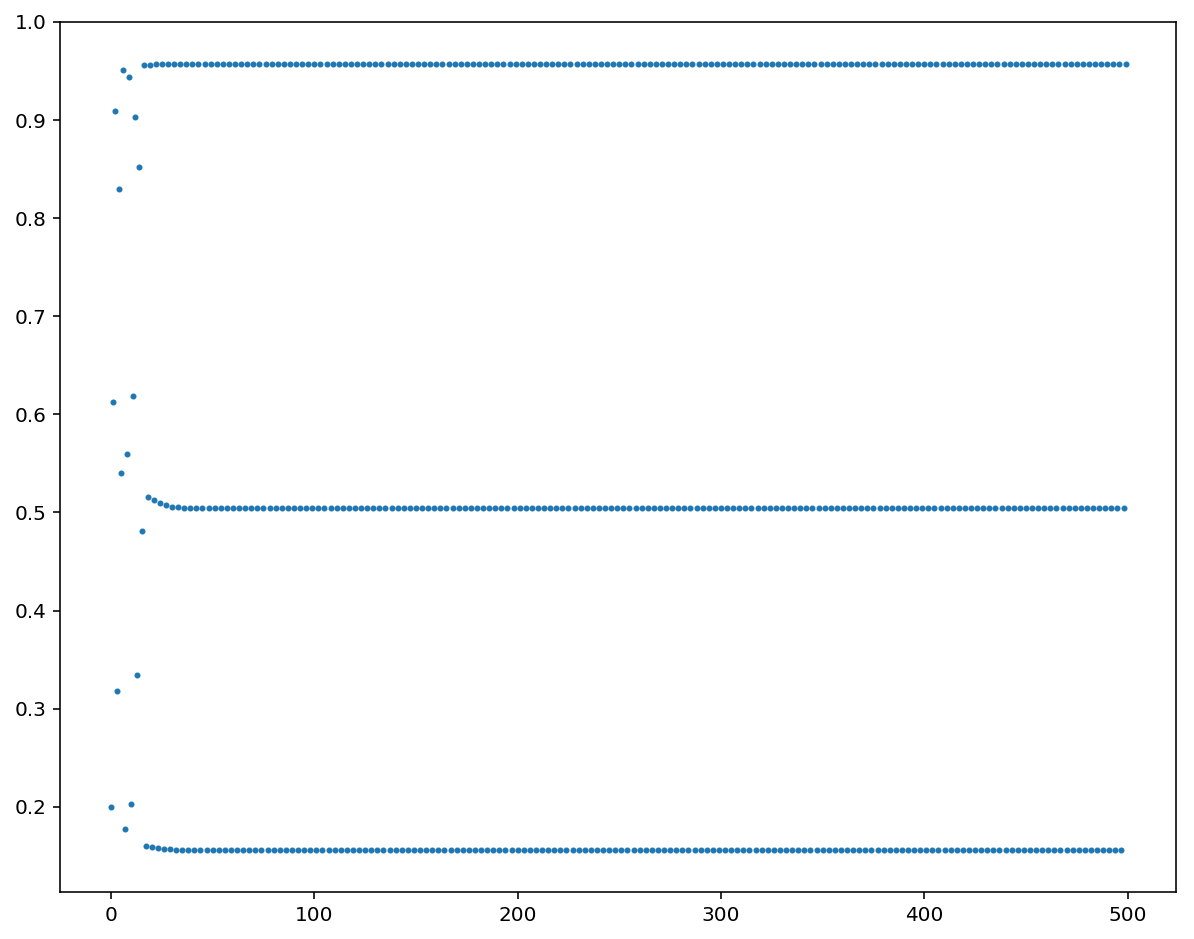

In [27]:
def plot_trajectory(a, x_0=0.2, n=500):
    trajectory = iterate_map(logistic_family(a), x_0, n)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(list(range(n)), trajectory, s=4)

plot_trajectory(3.8)
plot_trajectory(3.8282)
plot_trajectory(3.83)

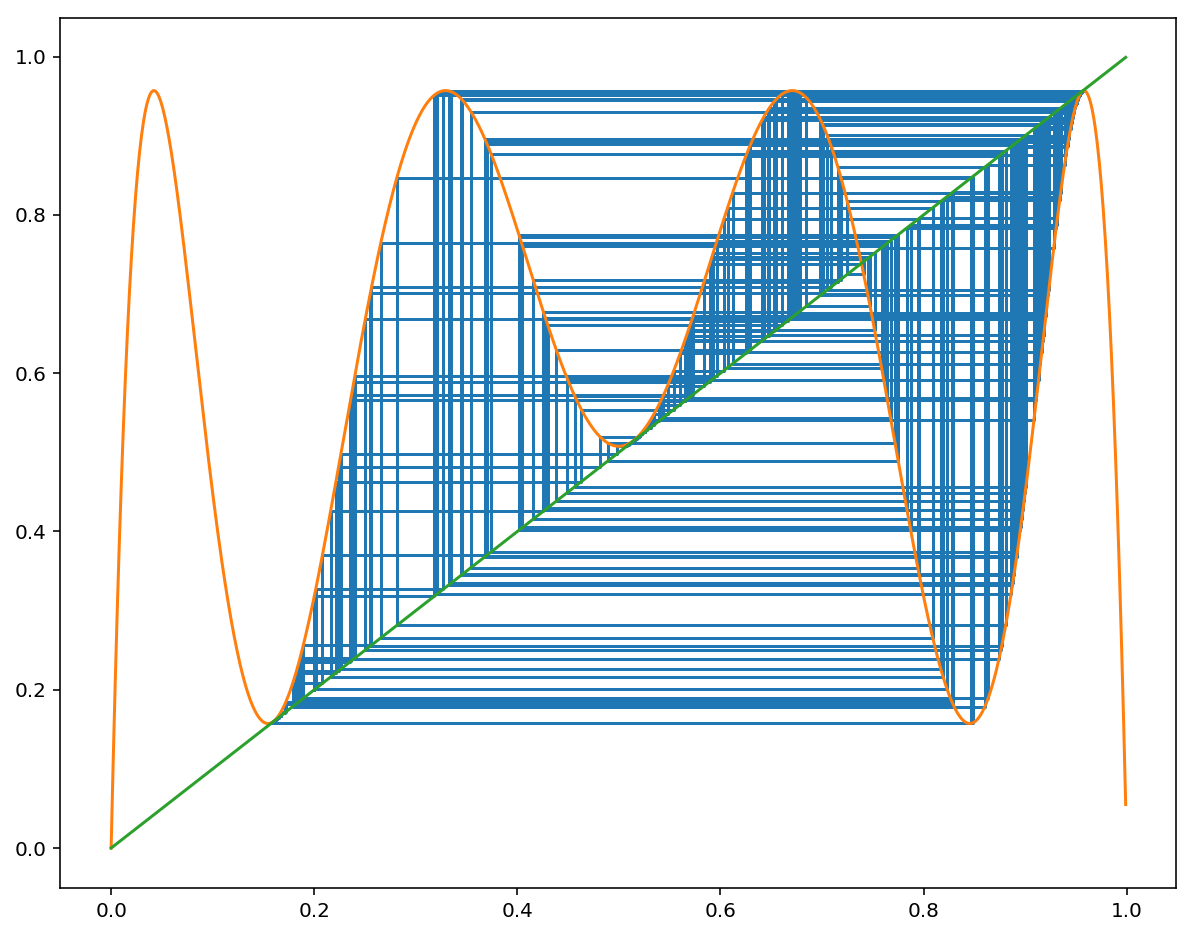

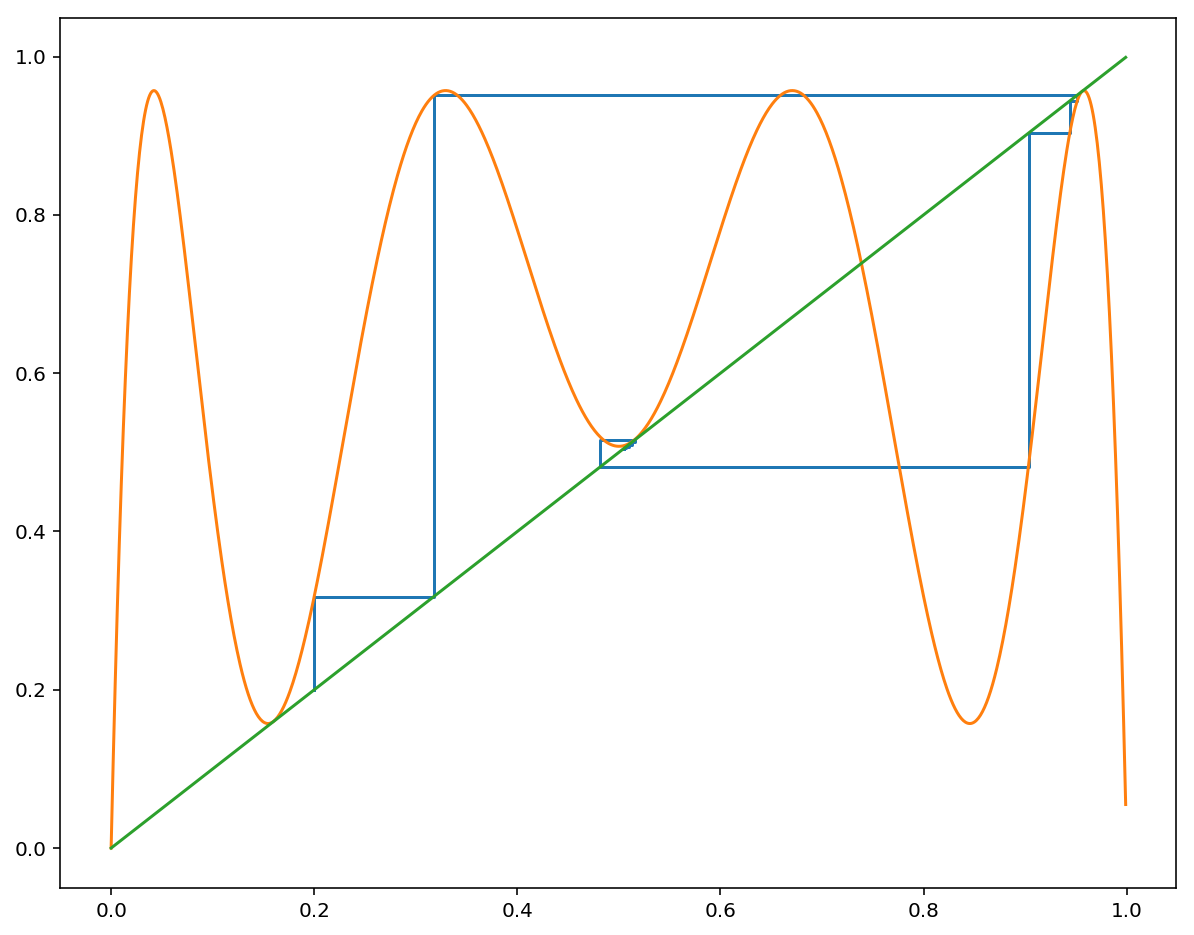

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
cobweb = get_cobweb(iterate_map(logistic_3(3.8282), 0.2, 500))

ax.plot(cobweb[:,0], cobweb[:,1])

plot_fns([logistic_3(3.8282), identity_fn], ax=ax)

fig, ax = plt.subplots(figsize=(10, 8))
cobweb = get_cobweb(iterate_map(logistic_3(3.83), 0.2, 500))

ax.plot(cobweb[:,0], cobweb[:,1])
plot_fns([logistic_3(3.8282), identity_fn], ax=ax) 

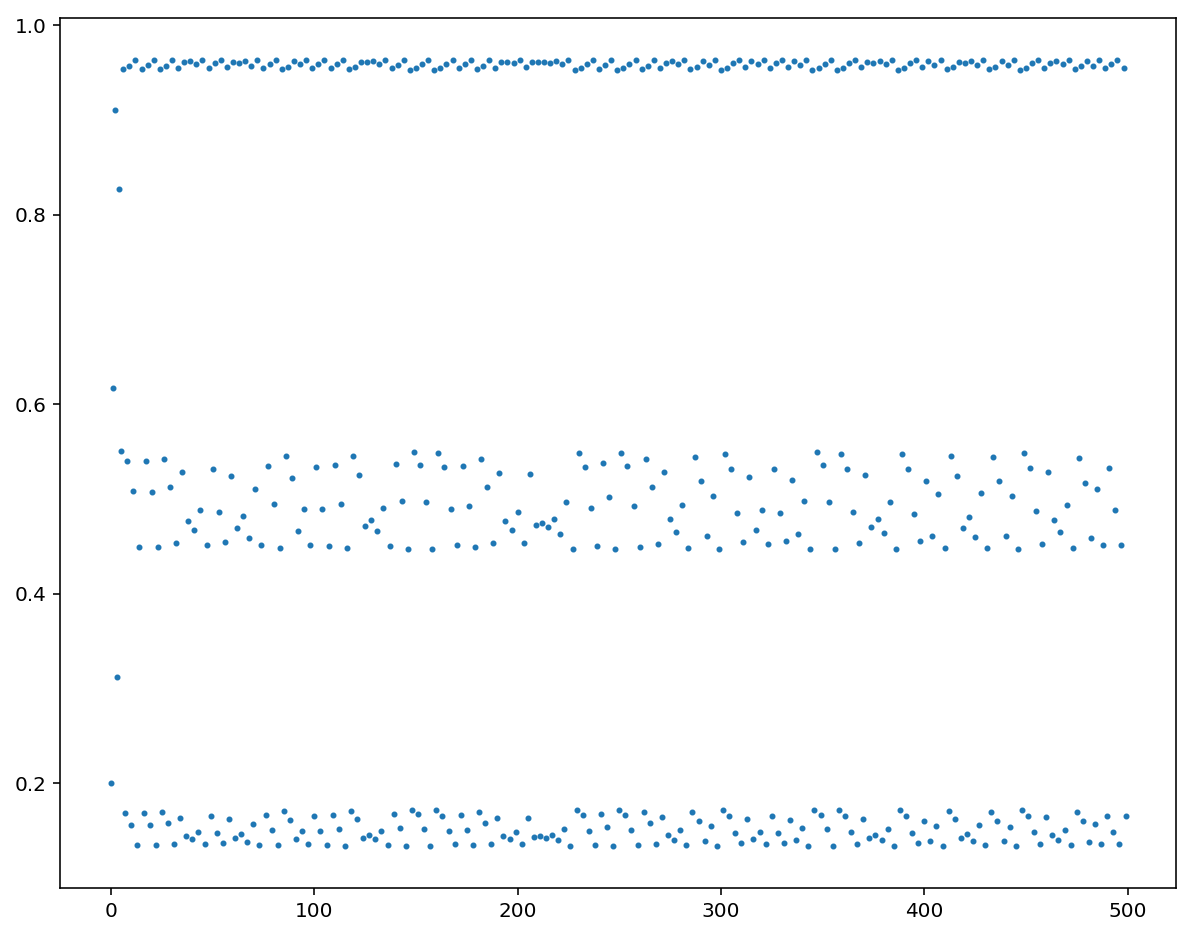

In [29]:
plot_trajectory(3.856)

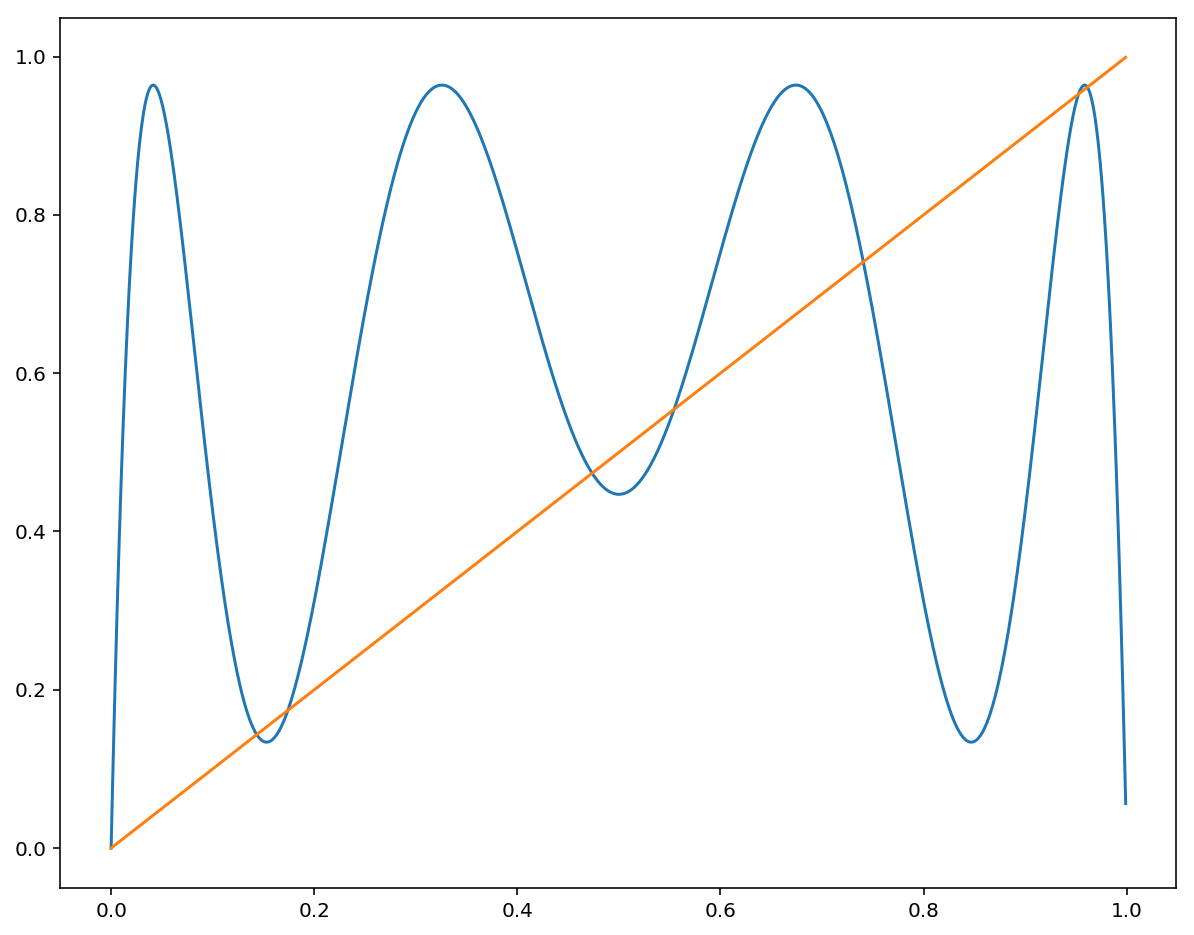

0.4735999999999919
0.554299999999994


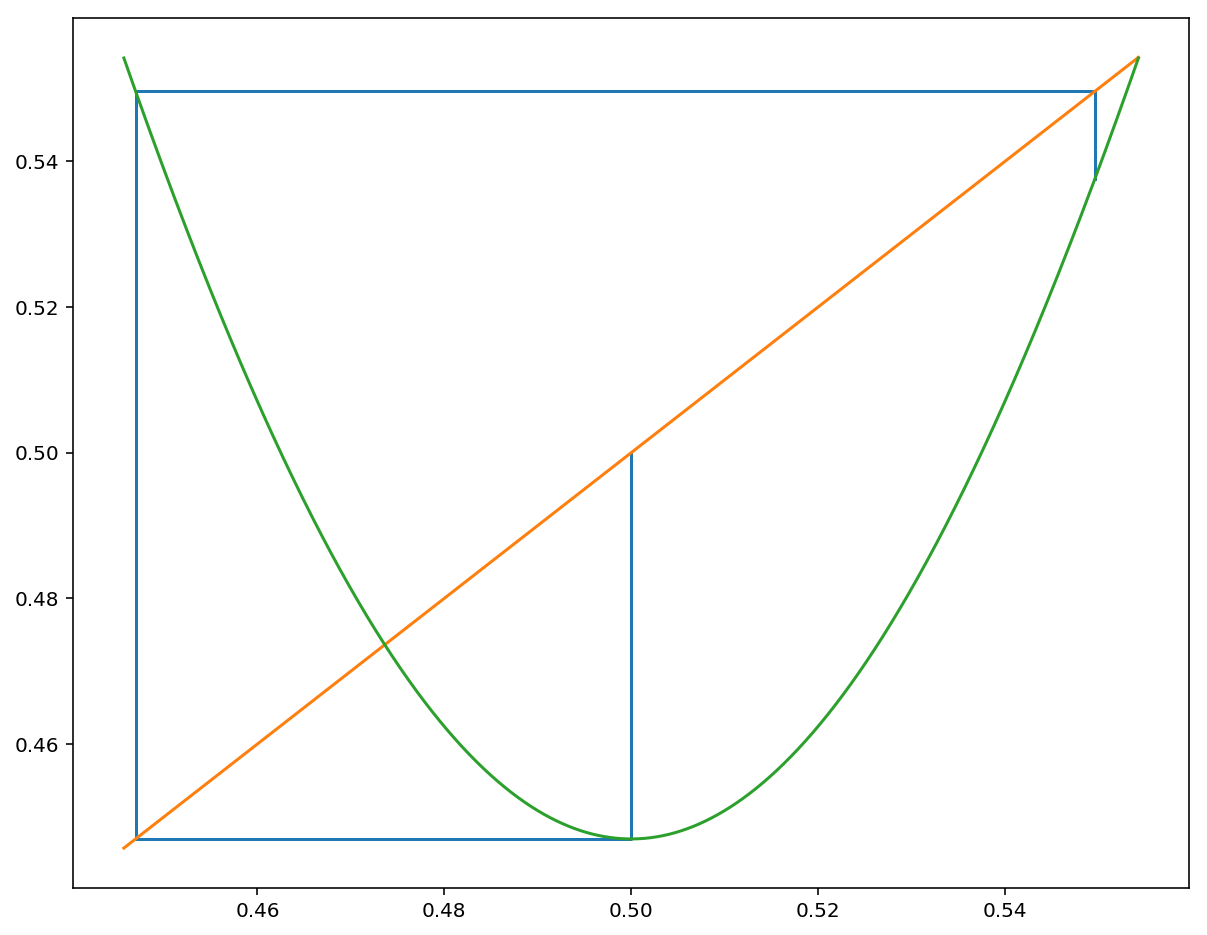

In [53]:
plot_fns([logistic_3(3.856), identity_fn])

for i in np.arange(0.4, 0.5, 0.0001):
    if abs(logistic_3(3.856)(i) - i) <= 0.0001:
        print(i)
        break
        
for i in np.arange(0.5, 0.6, 0.0001):
    if abs(logistic_3(3.856)(i) - i) <= 0.0001:
        print(i)
        break
        
x_r = 0.5543
# cobweb = get_cobweb(iterate_map(logistic_3(3.856), 0.47, 50))
cobweb = get_cobweb(iterate_map(logistic_3(3.856), 0.5, 4))
fig, ax = plt.subplots(figsize=(10, 8))
# plt.ylim(1-x_r, x_r)
# plt.xlim(1-x_r, x_r)
ax.plot(cobweb[:,0], cobweb[:,1])
# , lambda x: x_r
plot_fns([identity_fn, logistic_3(3.856)], start=1-x_r, end=x_r, step=0.000001, ax=ax)


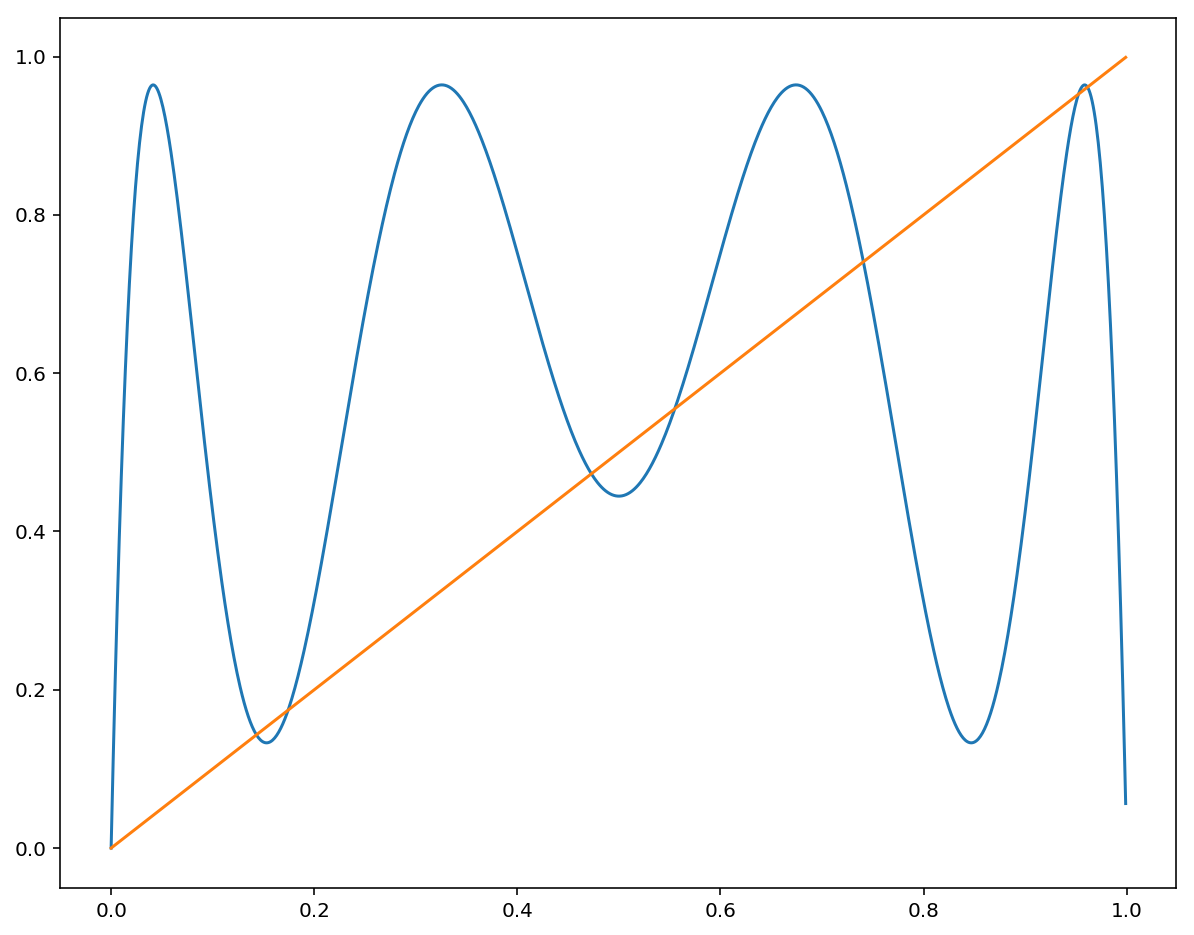

0.5550050000015817


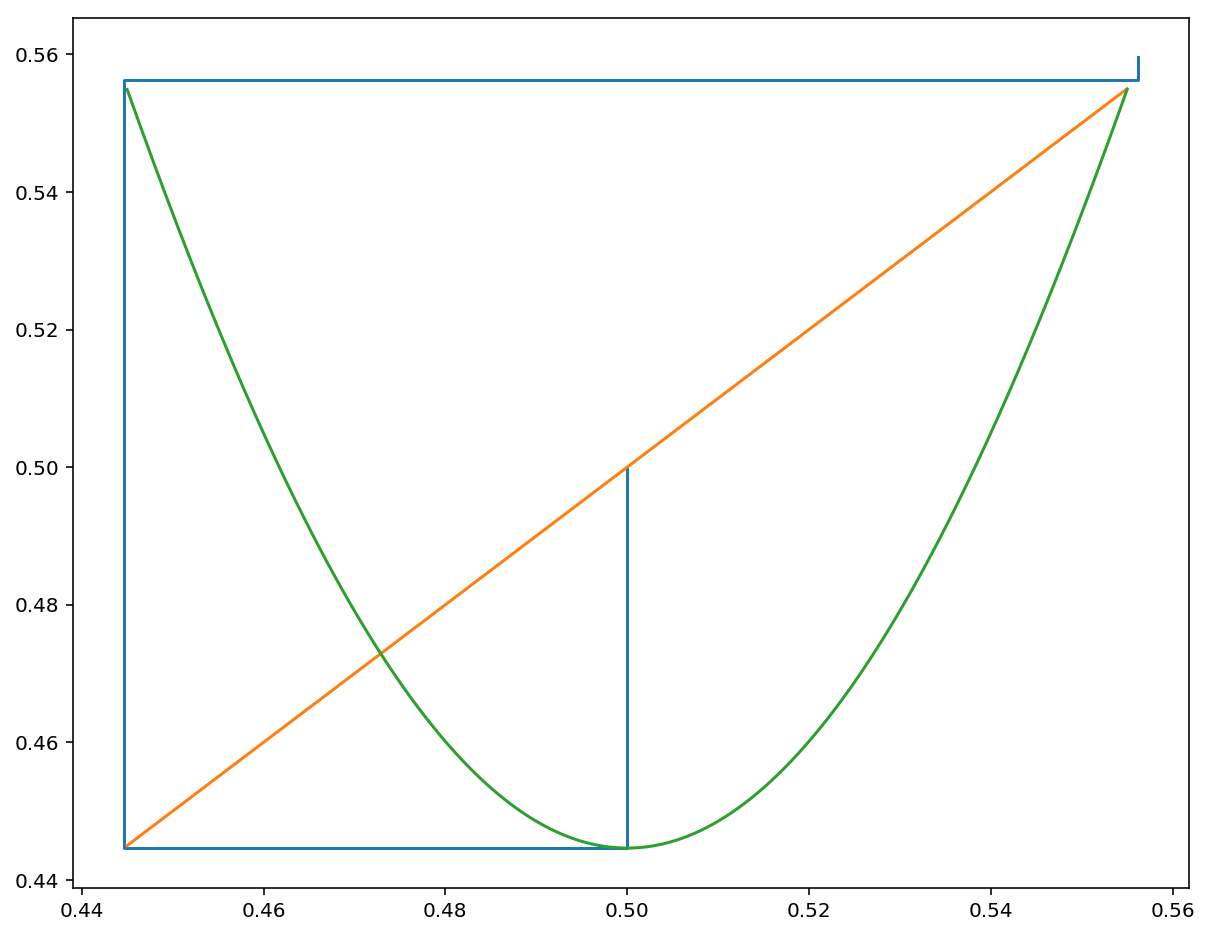

In [47]:
plot_fns([logistic_3(3.857), identity_fn])

for i in np.arange(0.5, 0.6, 0.000001):
    if abs(logistic_3(3.857)(i) - i) <= 0.0001:
        print(i)
        break

x_r = 0.5550

cobweb = get_cobweb(iterate_map(logistic_3(3.857), 0.5, 4))
fig, ax = plt.subplots(figsize=(10, 8))
# plt.ylim(1-x_r, x_r)
# plt.xlim(1-x_r, x_r)
ax.plot(cobweb[:,0], cobweb[:,1])
plot_fns([identity_fn, logistic_3(3.857)], start=1-x_r, end=x_r, step=0.000001, ax=ax)

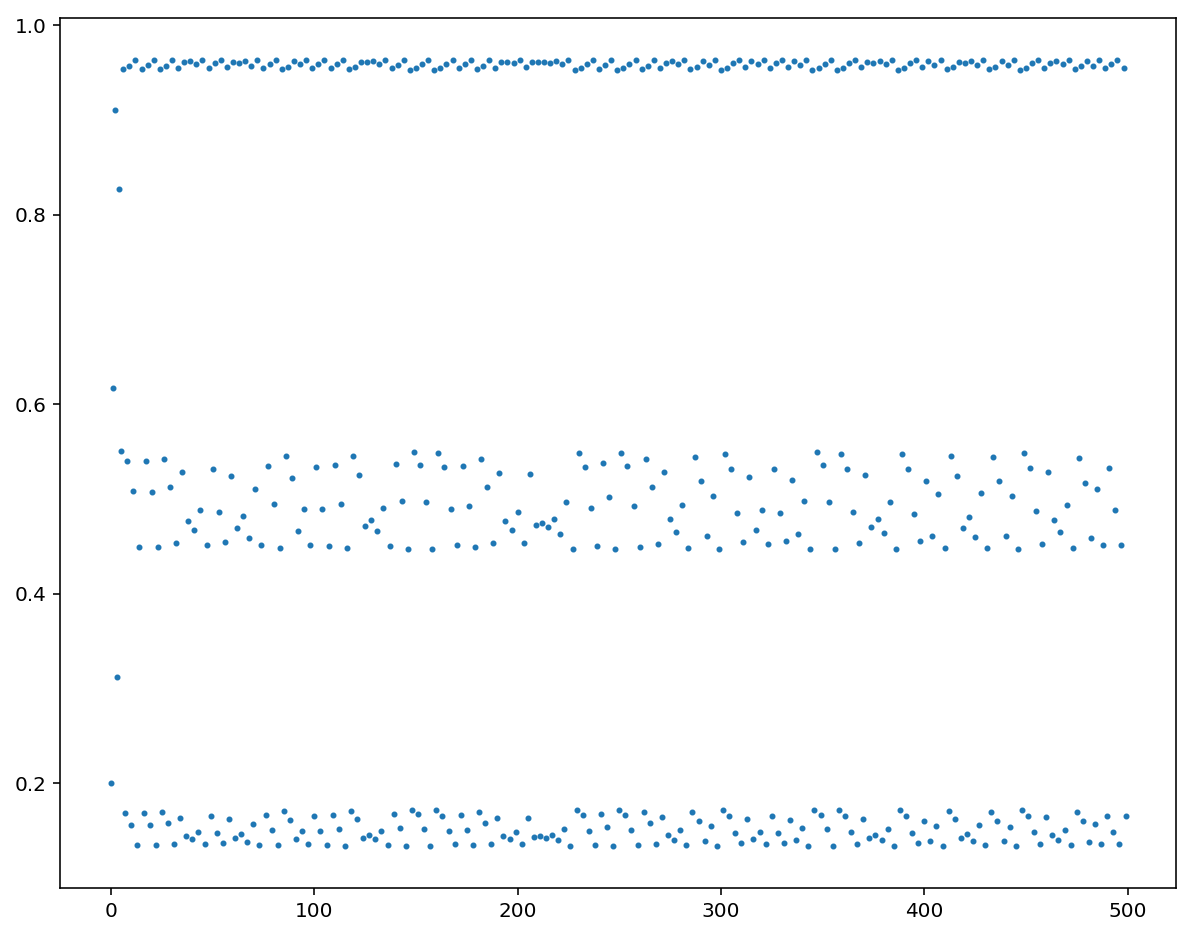

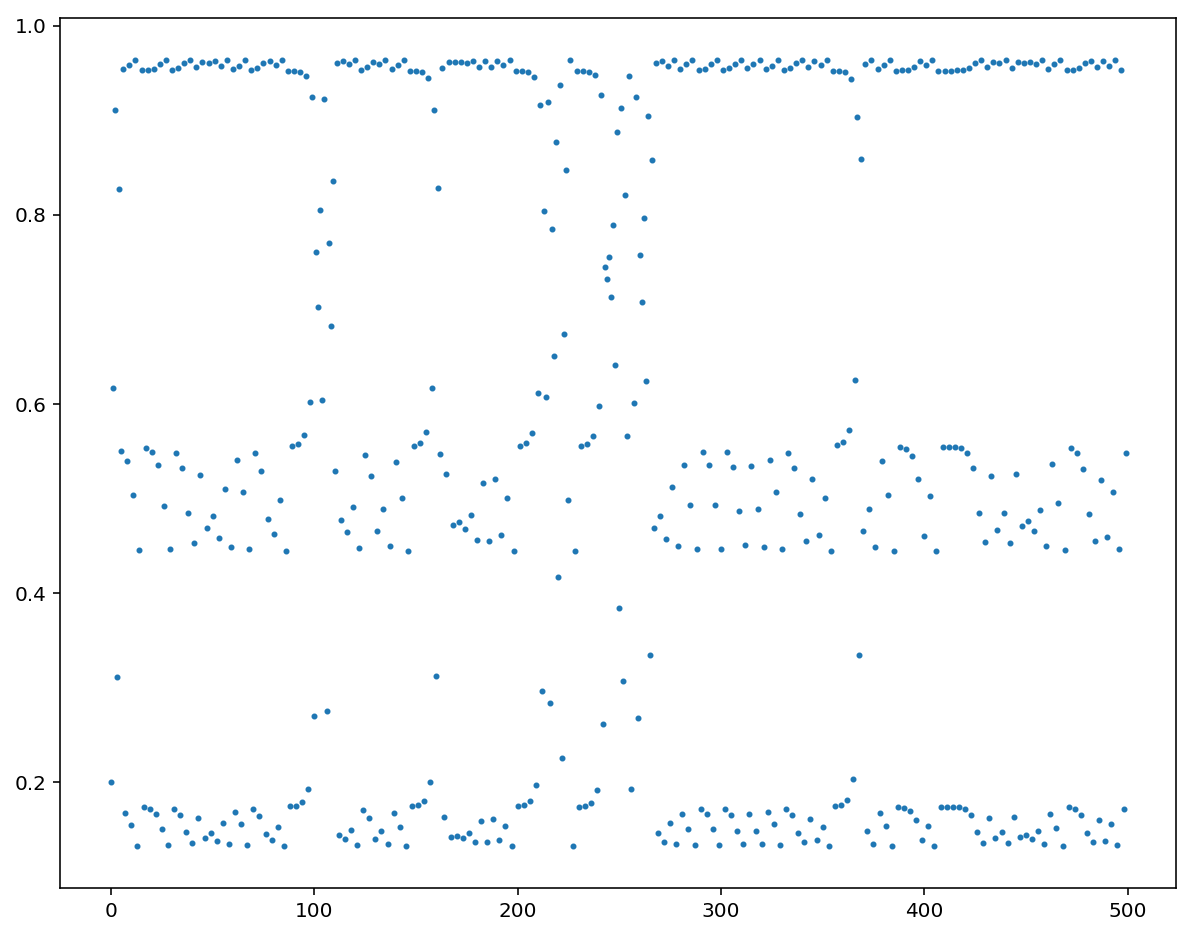

In [32]:
plot_trajectory(3.856)
plot_trajectory(3.857)